In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
df = pd.read_csv("D:/Telco-Customer-Churn.csv")

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [51]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

__There is a clear Class imbalance Which indicates that later in the evaluation stage accuracy is not the best measure and AUC ROC score , Precision and Recall are better__

In [63]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    le = LabelEncoder() 
    df_encoded[col] = le.fit_transform(df_encoded[col])

x= df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

mi = mutual_info_classif(x, y, discrete_features=True)
mi_series = pd.Series(mi, index=x.columns)
mi_series = mi_series.sort_values(ascending=False)
print(mi_series)

customerID          0.578599
TotalCharges        0.537173
MonthlyCharges      0.173902
Contract            0.098453
tenure              0.079309
OnlineSecurity      0.064677
TechSupport         0.063021
InternetService     0.055574
OnlineBackup        0.046792
PaymentMethod       0.044519
DeviceProtection    0.043917
StreamingMovies     0.032001
StreamingTV         0.031908
PaperlessBilling    0.019194
Dependents          0.014467
Partner             0.011454
SeniorCitizen       0.010577
MultipleLines       0.000801
PhoneService        0.000072
gender              0.000037
dtype: float64


C:\Users\aliel\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\aliel\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


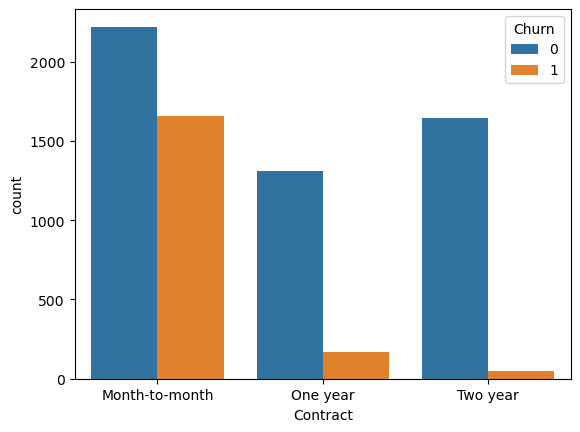

In [77]:
sns.countplot(data=df , x='Contract', hue='Churn')
plt.show()

**Customers on month-to-month contract tend to churn at extremely high rate** 

__Customers on Two year contract are very loyal__

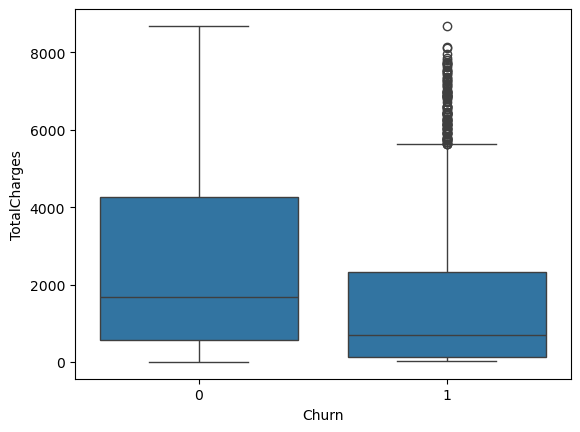

In [85]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.show()

**The BOX plot shows that people who churn have significantly lower total charges**

__The entire Box for churners is compressed at the lower end__

In [96]:
df = df.drop('customerID', axis=1)

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train['Churn'].values
y_test = df_test['Churn'].values
y_val = df_val['Churn'].values

x_train = df_train.drop('Churn', axis=1)
x_test = df_test.drop('Churn', axis=1)
x_val = df_val.drop('Churn', axis=1)


In [98]:
train_dict = x_train.to_dict(orient='records')
val_dict = x_val.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
x_train_encoded = dv.fit_transform(train_dict)
x_val_encoded = dv.transform(val_dict)


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(x_train_encoded, y_train)

y_pred_lr = lr.predict_proba(x_val_encoded)[:, 1]

auc_lr = roc_auc_score(y_val, y_pred_lr)
print(f"Logistic Regeression AUC: {auc_lr: .4f}")

Logistic Regeression AUC:  0.8371


In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(x_train_encoded, y_train)

y_pred_rf = rf.predict_proba(x_val_encoded)[:, 1]

auc_rf = roc_auc_score(y_val, y_pred_rf)
print(f"Random Forest AUC: {auc_rf: .4f}")

Random Forest AUC:  0.8133


In [112]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train_encoded, y_train)

y_pred_dt = dt.predict_proba(x_val_encoded)[:, 1]

auc_dt = roc_auc_score(y_val, y_pred_dt)
print(f"Decision Tree AUC: {auc_dt: .4f}")

Decision Tree AUC:  0.8146


In [106]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric = 'logloss')
xgb.fit(x_train_encoded, y_train)

y_pred_xgb = xgb.predict_proba(x_val_encoded)[:, 1]

auc_xgb = roc_auc_score(y_val, y_pred_xgb)
print(f"XGB AUC: {auc_xgb: .4f}")

XGB AUC:  0.8265


C:\Users\aliel\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:02:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


__The  best Model is Logistic Regression__

C:0.0001, AUC:0.7840
C:0.001, AUC:0.8049
C: 0.01, AUC:0.8341
C:  0.1, AUC:0.8371
C:  0.5, AUC:0.8370
C:    1, AUC:0.8371
C:    5, AUC:0.8371
C:   10, AUC:0.8371


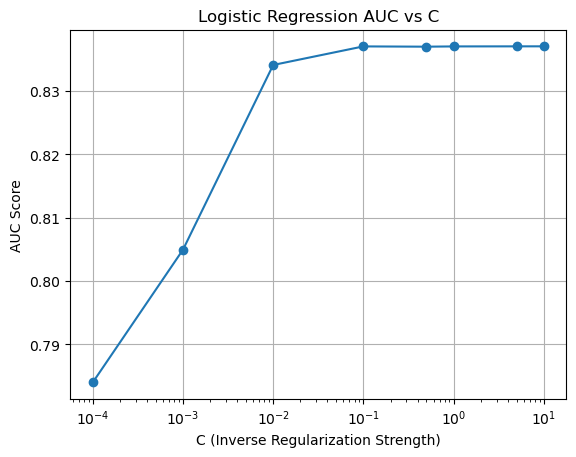

In [125]:
c_values = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]
auc_scores = []
for c in c_values:
    lr = LogisticRegression(solver='liblinear', C=c, random_state=42)
    lr.fit(x_train_encoded, y_train)

    y_pred_lr = lr.predict_proba(x_val_encoded)[:, 1]

    auc = roc_auc_score(y_val, y_pred_lr)
    auc_scores.append(auc)
    print(f"C:{c:5}, AUC:{auc:.4f}")

plt.plot(c_values, auc_scores, marker='o')
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("AUC Score")
plt.title("Logistic Regression AUC vs C")
plt.xscale('log')
plt.grid(True)
plt.show()

In [129]:
model = LogisticRegression(C=0.1, solver='liblinear', random_state=42)

x_train_full = np.concatenate([x_train_encoded, x_val_encoded]) 
y_train_full = np.concatenate([y_train, y_val])

model.fit(x_train_full, y_train_full)

x_test_dict = x_test.to_dict(orient='records')
x_test_encoded = dv.transform(x_test_dict)

y_pred = model.predict_proba(x_test_encoded)[:, 1]

auc_final = roc_auc_score(y_test, y_pred)
print(f"Final Model AUC : {auc_final:.4f}")

Final Model AUC : 0.8616


In [133]:
import pickle

with open('dv.bin', 'wb') as f_out:
    pickle.dump(dv, f_out)


with open('model.bin', 'wb') as f_out:
    pickle.dump(model, f_out)